### Step 1. Importing libraries and data sets

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import haversine as hs
import os
import datetime
from datetime import date
import folium
import json
import haversine as hs
from IPython.core.display import display, HTML


MAGENTA = "#6C3483"
GREEN = "#239B56"
BLUE = "#5DADE2"

/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_73003/2911688678.py:15: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
path=r'/Users/Dimitris/Desktop/CF Data Analytics/Data Immersion/Achievement 6/02 Data'

In [5]:
# Import the “df_1701_1912.pkl” file into Jupyter as df_1701_1912

df_1701_1912 = pd.read_pickle(os.path.join(path, 'Prepared Data', 'df_1701_1912.pkl'))

In [6]:
# Import ".json" file for the U.S. as geo_d

geo_d = r'/Users/Dimitris/Desktop/CF Data Analytics/Data Immersion/Achievement 6/02 Data/Original Data/custom.geo.json'

In [7]:
# View the JSON file contents

f = open(r'/Users/Dimitris/Desktop/CF Data Analytics/Data Immersion/Achievement 6/02 Data/Original Data/custom.geo.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'featurecla': 'Admin-0 country', 'scalerank': 1, 'labelrank': 5, 'sovereignt': 'Costa Rica', 'sov_a3': 'CRI', 'adm0_dif': 0, 'level': 2, 'type': 'Sovereign country', 'tlc': '1', 'admin': 'Costa Rica', 'adm0_a3': 'CRI', 'geou_dif': 0, 'geounit': 'Costa Rica', 'gu_a3': 'CRI', 'su_dif': 0, 'subunit': 'Costa Rica', 'su_a3': 'CRI', 'brk_diff': 0, 'name': 'Costa Rica', 'name_long': 'Costa Rica', 'brk_a3': 'CRI', 'brk_name': 'Costa Rica', 'brk_group': None, 'abbrev': 'C.R.', 'postal': 'CR', 'formal_en': 'Republic of Costa Rica', 'formal_fr': None, 'name_ciawf': 'Costa Rica', 'note_adm0': None, 'note_brk': None, 'name_sort': 'Costa Rica', 'name_alt': None, 'mapcolor7': 3, 'mapcolor8': 2, 'mapcolor9': 4, 'mapcolor13': 2, 'pop_est': 5047561, 'pop_rank': 13, 'pop_year': 2019, 'gdp_md': 61801, 'gdp_year': 2019, 'economy': '5. Emerging region: G20', 'income_grp': '3. Upper middle income', 'fips_10': 'CS', 'iso_a2': 'CR', 'iso_a2_eh': 'CR', 'iso_a3': 'CRI', 'iso_a3

In [8]:
df_1701_1912.dtypes

trip_duration                int64
start_time                  object
stop_time                   object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
birth_year                 float64
gender                       int64
dtype: object

In [9]:
df_1701_1912.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226.0,W 82 St & Central Park West,40.782750,-73.971370,3165.0,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263.0,Cooper Square & E 7 St,40.729236,-73.990868,498.0,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143.0,5 Ave & E 78 St,40.776829,-73.963888,3152.0,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143.0,5 Ave & E 78 St,40.776829,-73.963888,3152.0,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143.0,5 Ave & E 78 St,40.776829,-73.963888,3152.0,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0


In [10]:
# Create a sample of the dataframe - The current size is too large to work on my personal computer so I will create a
# sample 25% the size of the dataframe and work on that.

rate = 4
df_sub = df_1701_1912[::rate]
df_sub.shape

(12709621, 15)

In [11]:
# Change data types

df_sub[['start_time','stop_time']] =  df_sub[['start_time','stop_time']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')
df_sub.dropna(inplace=True)

/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_73003/4112090980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub[['start_time','stop_time']] =  df_sub[['start_time','stop_time']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')
/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_73003/4112090980.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.dropna(inplace=True)


In [12]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12302078 entries, 0 to 955207
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   trip_duration            int64         
 1   start_time               datetime64[ns]
 2   stop_time                datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  birth_year               float64       
 14  gender                   int64         
dtypes: datetime64[ns](2), float64(7), int64(3), object(3)
memory usage: 1.5+ GB


In [13]:
# Change "trip_duration" column format from seconds to minutes

df_sub["trip_duration"] = df_sub["trip_duration"]/60

/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_73003/1769597753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["trip_duration"] = df_sub["trip_duration"]/60


In [14]:
# Add hour_of_day based on start_time column

df_sub['hour_of_day'] = df_sub['start_time'].dt.hour

/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_73003/3376338462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['hour_of_day'] = df_sub['start_time'].dt.hour


In [15]:
# Replace value in gender '0', 1' and '2' with 'M' and 'F'

df_sub['gender'] = df_sub['gender'].map({2: 'F', 1: 'M', 0: 'N/A'})

/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_73003/2581369727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['gender'] = df_sub['gender'].map({2: 'F', 1: 'M', 0: 'N/A'})


In [16]:
# Save changes to column gender

df_sub = df_sub

In [17]:
# Calculate age from birth_year column

df_sub['age'] = df_sub['start_time'].dt.year - df_sub['birth_year']

/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_73003/1879481320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['age'] = df_sub['start_time'].dt.year - df_sub['birth_year']


In [18]:
# Save changes to dataframe

df_sub = df_sub

In [19]:
# Add 'trip_type' column

df_sub['trip_type'] = np.where(df_sub['trip_duration'] < 6, "short trip", np.where(
    (df_sub['trip_duration'] >= 6) & (df_sub['trip_duration'] <= 18), "average trip", np.where(
    (df_sub['trip_duration'] > 18) & (df_sub['trip_duration'] <= 90), "long trip", "extra long trip")))

/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_73003/3972965968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['trip_type'] = np.where(df_sub['trip_duration'] < 6, "short trip", np.where(


In [20]:
df_sub['trip_type'].value_counts(dropna = False)

average trip       6314538
short trip         3114271
long trip          2826648
extra long trip      46621
Name: trip_type, dtype: int64

In [21]:
# Add 'age_group' column

df_sub['age_group'] = np.where(df_sub['age'] < 18, '[0, 18]', np.where(
    (df_sub['age'] >= 18) & (df_sub['age'] < 30), '[18, 30]', np.where(
    (df_sub['age'] >= 30) & (df_sub['age'] < 50), '[30, 50]', np.where(
    (df_sub['age'] >= 50) & (df_sub['age'] < 70), '[50, 70]', '[70+]'))))

/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_73003/1867651552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['age_group'] = np.where(df_sub['age'] < 18, '[0, 18]', np.where(


In [22]:
# Add 'start & end station location' column

df_sub['start_station_location'] = df_sub[['start_station_latitude','start_station_longitude']].values.tolist()
df_sub['end_station_location'] = df_sub[['end_station_latitude', 'end_station_longitude']].values.tolist()

/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_73003/3478002579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['start_station_location'] = df_sub[['start_station_latitude','start_station_longitude']].values.tolist()
/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_73003/3478002579.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['end_station_location'] = df_sub[['end_station_latitude', 'end_station_longitude']].values.tolist()


In [23]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_sub.describe()

,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,hour_of_day,age
count,12302078.000,12302078.000,12302078.000,12302078.000,12302078.000,12302078.000,12302078.000,12302078.000,12302078.000,12302078.000,12302078.000
mean,15.543,1561.349,40.737,-73.983,1552.607,40.736,-73.982,27234.241,1979.519,13.870,38.664
std,191.976,1439.168,0.049,0.073,1438.253,0.146,0.260,7029.921,12.032,4.875,12.017
min,1.017,72.000,0.000,-74.097,72.000,0.000,-74.097,14529.000,1857.000,0.000,16.000
25%,5.950,379.000,40.718,-73.995,377.000,40.718,-73.996,20539.000,1970.000,10.000,29.000
50%,9.950,502.000,40.738,-73.986,501.000,40.737,-73.987,28142.000,1982.000,14.000,36.000
75%,17.250,3238.000,40.757,-73.973,3238.000,40.756,-73.974,32426.000,1989.000,18.000,48.000
max,155671.017,3911.000,45.506,0.000,3911.000,45.506,0.000,42046.000,2003.000,23.000,162.000


/Users/Dimitris/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


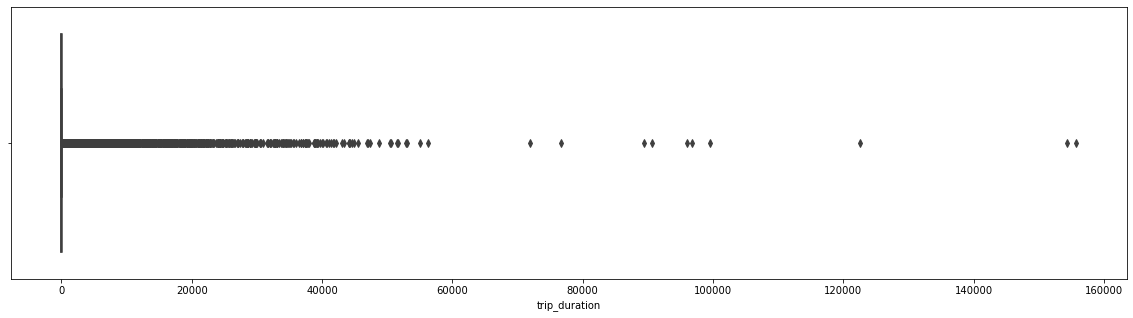

In [25]:
# trip_duration Outlier

plt.figure(figsize = (20,5))
sns.boxplot(df_sub.trip_duration)
plt.show()

### NYC Citi bikes has three pricing oprions. 'Single ride' allows for a 30-minute ride. 'Day pass' allows for unlimited 30-minute rides within a 24-hour period and 'Annual Membership' allows for unlimited 45-minute rides. After the time limit, there is extra charge per minute. It seems unreasonable that riders would pay extra per minute continuously for hours or days.

In [26]:
# dataframe with > 180-minute rides

df_long_rides = df_sub[(df_sub['trip_duration'] >  180)]
df_long_rides['trip_duration'].value_counts(dropna = False)

180.317     9
202.150     7
201.800     7
187.900     7
197.900     7
           ..
1395.417    1
195.050     1
2706.417    1
353.183     1
2034.983    1
Name: trip_duration, Length: 13993, dtype: int64

In [27]:
# Delete bike riders < 2 minutes and over 180 minutes

df_sub = df_sub[(2 < df_sub['trip_duration']) & (df_sub['trip_duration'] <  180)]

In [28]:
df_sub = df_sub

/Users/Dimitris/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


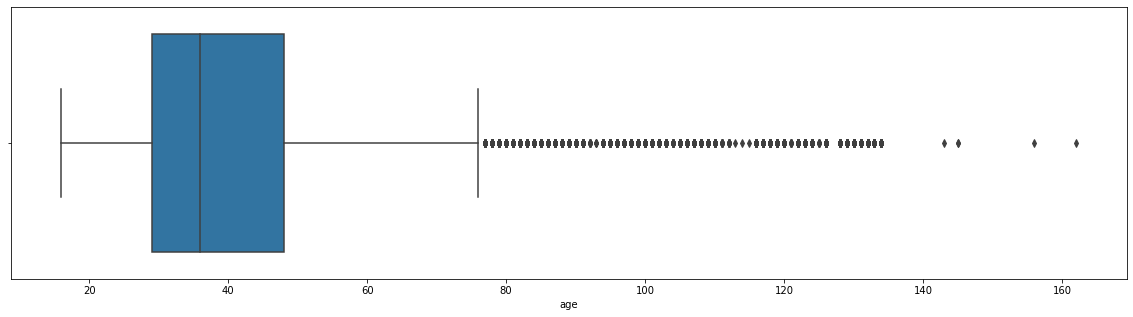

In [29]:
# age Outlier

plt.figure(figsize = (20,5))
sns.boxplot(df_sub.age)
plt.show()

### People having age above 80yrs (approx) are outliers for this dataset.

In [30]:
# Deleting rows where the age is over 80

df_sub.drop(df_sub[df_sub.age > 80].index, inplace=True)

/Users/Dimitris/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


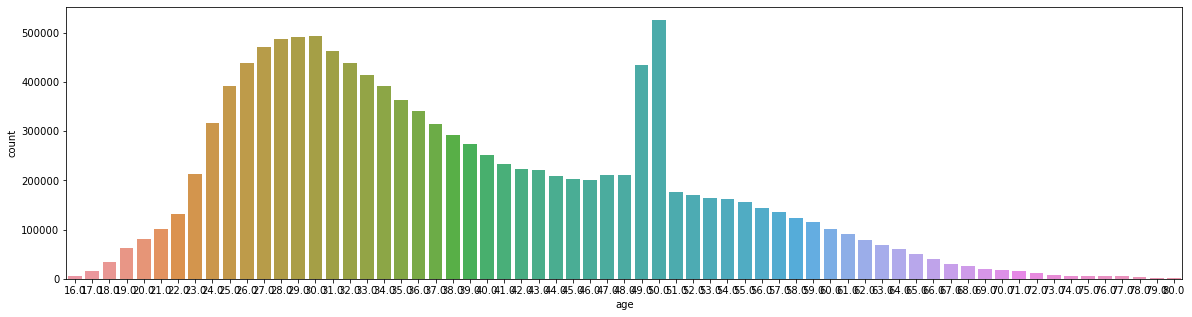

In [31]:
plt.figure(figsize = (20,5))
sns.countplot(df_sub["age"])
plt.show()

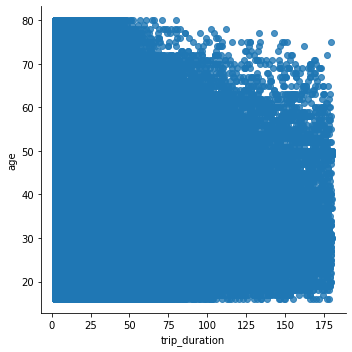

In [32]:
# Create a scatterplot for the "trip_duration" and "age" columns

sns.lmplot(x = 'trip_duration', y = 'age', data = df_sub)

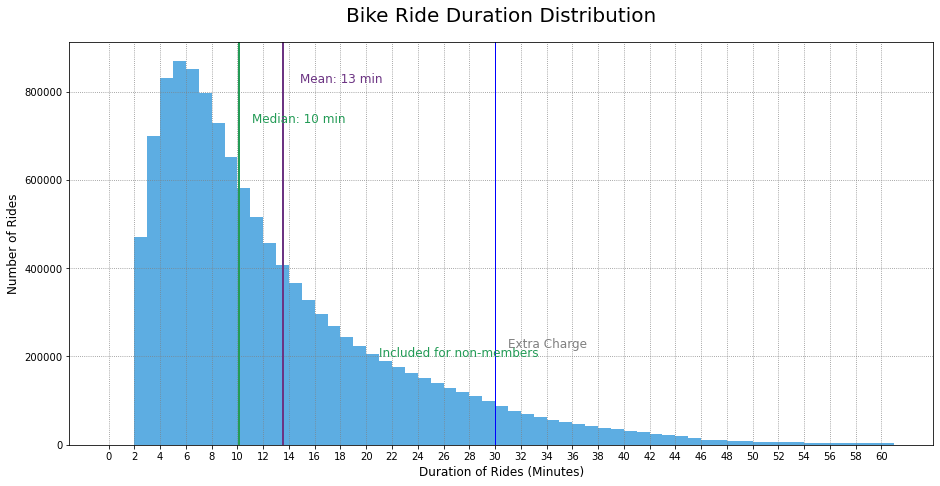

In [33]:
# Bike ride duration distribution

def trip_duration(df_sub):
    
    df = df_sub.copy()
    
    # Filtering relevant data
    
    duration_data = df['trip_duration']
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    # Ploting the histogram
    
    plt.hist(duration_data, bins = range(62), color = BLUE, histtype ='bar')

    # Adding median and mean lines
    
    plt.axvline(df['trip_duration'].mean(), color=MAGENTA, linestyle='-', linewidth=2 )
    plt.axvline(df['trip_duration'].median(), color=GREEN, linestyle='-', linewidth=2 )
    plt.axvline(x = 30, color='blue', linestyle='-', linewidth=1 )

    # Adding median and mean texts
    
    min_ylim, max_ylim = plt.ylim()
    plt.text(df['trip_duration'].mean()*1.1, max_ylim*0.9, 'Mean: {:.0f} min'.format(df['trip_duration'].mean()), color = MAGENTA,  fontsize= 12)
    plt.text(df['trip_duration'].median()*1.1, max_ylim*0.8, 'Median: {:.0f} min'.format(df['trip_duration'].median()), color = GREEN, fontsize= 12)
    plt.text(x= 21,y=200000, s='Included for non-members', color = GREEN, fontsize= 12)
    plt.text(x= 31,y=220000, s='Extra Charge', color = 'grey', fontsize= 12)

    # Seting ticks on x axis
    
    ticks =range(0, 62, 2)
    plt.xticks(ticks)
    
    # Seting ticks on y axis
    
    ticks =range(0, 3600, 2000)

    # Labeling Axes
    
    ax.set_title('Bike Ride Duration Distribution', fontdict={'fontsize':20}, pad = 20)
    plt.xlabel('Duration of Rides (Minutes)', fontsize= 12, x = 0.5)
    plt.ylabel('Number of Rides', fontsize= 12)

    # Adding Grid
               
    plt.grid(linestyle=':', color='grey')
    
    plt.show()

trip_duration(df_sub)

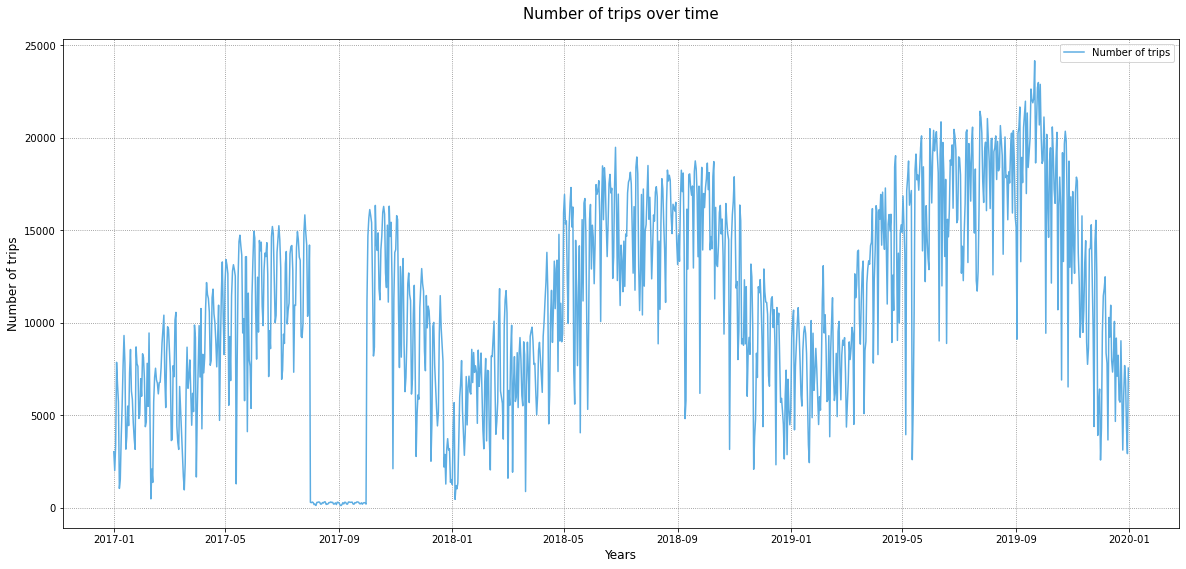

In [34]:
# Usage of bikes per year

def trips_by_year(df_sub):
    
    # Data
    
    df_usage = df_sub.copy()
    df_over_time = df_usage.groupby(df_usage['start_time'].dt.date).size().reset_index(name='count')

    # Figure
    
    fig, ax = plt.subplots(figsize=(20,9))
    plt.plot(df_over_time['start_time'], df_over_time['count'], color= BLUE)

    # Labels
    
    ax.set_title('Number of trips over time', fontsize= 15, pad= 20)
    ax.set_ylabel('Number of trips', fontsize=12)
    ax.set_xlabel('Years', fontsize=12)

    # Grid & Legend
    
    plt.grid(linestyle=':', color='grey')
    plt.legend(['Number of trips'])
    
    plt.show()

trips_by_year(df_sub)

<AxesSubplot:xlabel='hour_of_day', ylabel='Count'>

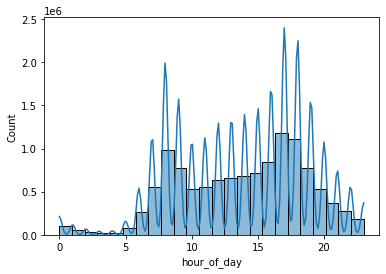

In [35]:
# Create a histogram the "time_of_day" column

sns.histplot(df_sub['hour_of_day'], bins = 24, kde = True)

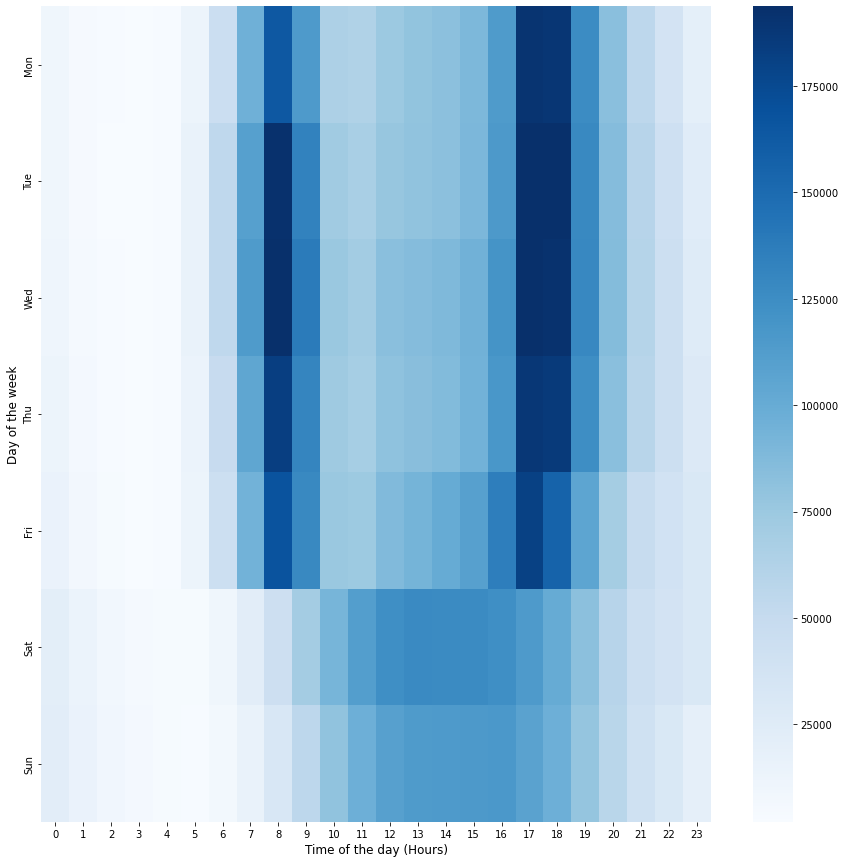

In [36]:
# Usage of bikes per week

def weekday_heatmap(df_sub):
    
    weekdays = ["Mon", "Tue","Wed", "Thu", "Fri", "Sat", "Sun"]
    
    # Data
    
    df_week = df_sub.copy()
    df_week['hour'] = pd.DatetimeIndex(df_week['start_time']).hour
    df_week['weekday'] = pd.DatetimeIndex(df_week['start_time']).weekday
    daily_activity = df_week.groupby(by=['weekday','hour']).count()['start_time'].unstack()

    # Figure
    
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(daily_activity, robust=True, cmap="Blues", yticklabels=weekdays)

    # Labeling Axes
    
    plt.xlabel("Time of the day (Hours)", fontsize= 12, x = 0.5)
    plt.ylabel("Day of the week", fontsize= 12)


weekday_heatmap(df_sub)

In [37]:
# Find most popular start stations based on start_station_name column

df_sub['start_station_name'].value_counts(dropna = False)

Pershing Square North        105440
E 17 St & Broadway            75352
Broadway & E 22 St            72891
W 21 St & 6 Ave               72316
8 Ave & W 31 St               66852
                              ...  
Handlebar @ Gowanus               2
LPI Facility                      1
Madison St & Woodward Ave         1
Fairview Ave & Linden St          1
Adventures NYC                    1
Name: start_station_name, Length: 1078, dtype: int64

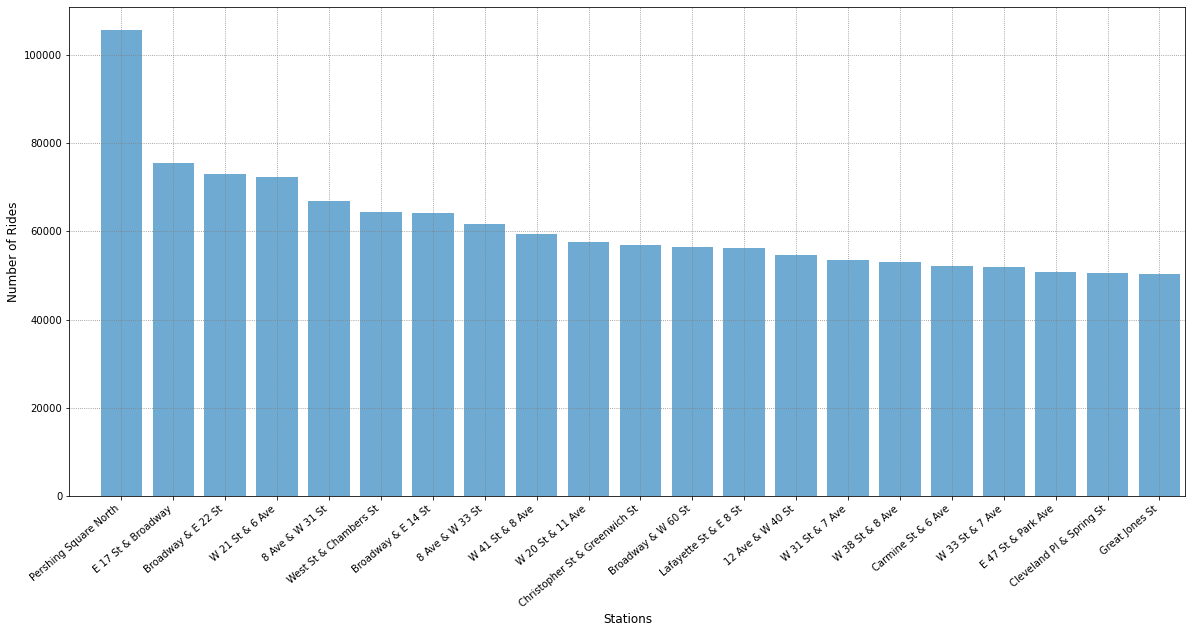

In [38]:
# Most busy bike start stations

def top_dep_stations(df_sub):
    
    # Data
    
    df_dep = df_sub.copy()


    # Figure
    
    fig = plt.figure(figsize=(20,9))
    ax = sns.countplot(x='start_station_name', color = BLUE, data=df_dep, order = df_dep['start_station_name'].value_counts().index)

    # Labeling Axes
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    plt.xlabel('Stations', fontsize= 12, x = 0.5)
    plt.ylabel('Number of Rides', fontsize= 12)
    plt.xlim(-1,20.5)

    # Adding Grid
    plt.grid(linestyle=':', color='grey')

top_dep_stations(df_sub)

In [39]:
# Find most popular return stations based on end_station_name column

df_sub['end_station_name'].value_counts(dropna = False)

Pershing Square North       105148
E 17 St & Broadway           78485
Broadway & E 22 St           77990
W 21 St & 6 Ave              73758
West St & Chambers St        69043
                             ...  
Washington St                    1
8D QC Station 01                 1
Pathmark Depot                   1
58th St Depot                    1
Fairview Ave & Linden St         1
Name: end_station_name, Length: 1087, dtype: int64

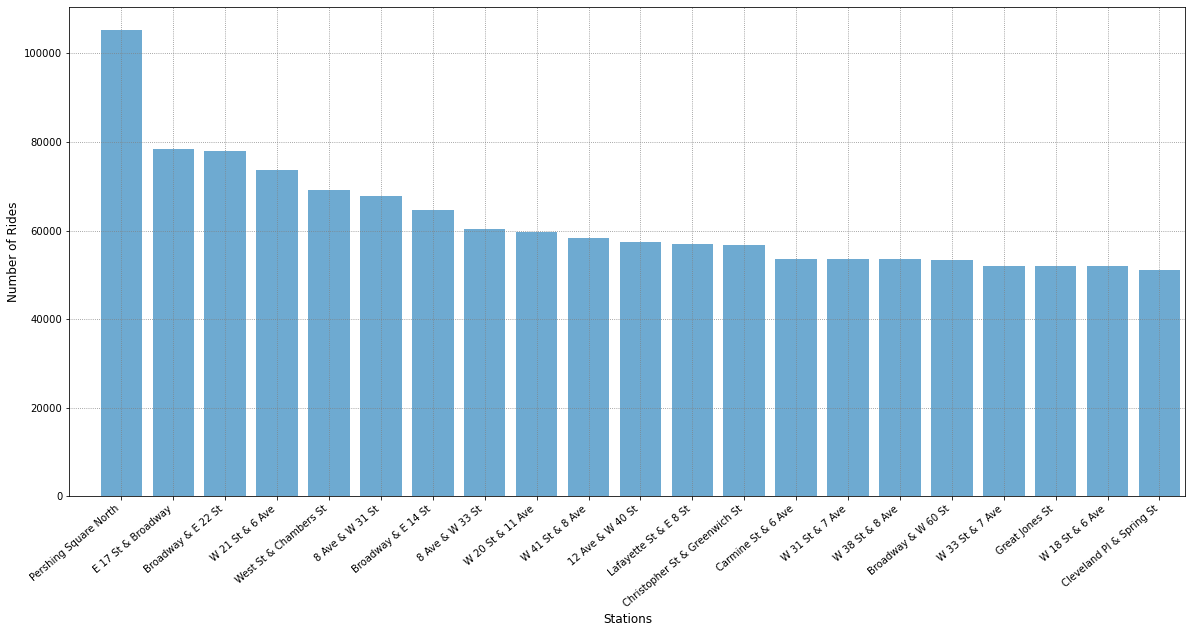

In [40]:
# Most busy bike return stations

def top_arr_stations(df_sub):
    
    # Data
    
    df_arr = df_sub.copy()


    # Figure
    
    fig = plt.figure(figsize=(20,9))
    ax = sns.countplot(x='end_station_name', color = BLUE, data=df_arr, order = df_arr['end_station_name'].value_counts().index)

    # Labeling Axes
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    plt.xlabel('Stations', fontsize= 12, x = 0.5)
    plt.ylabel('Number of Rides', fontsize= 12)
    plt.xlim(-1,20.5)

    # Adding Grid
    plt.grid(linestyle=':', color='grey')

top_arr_stations(df_sub)

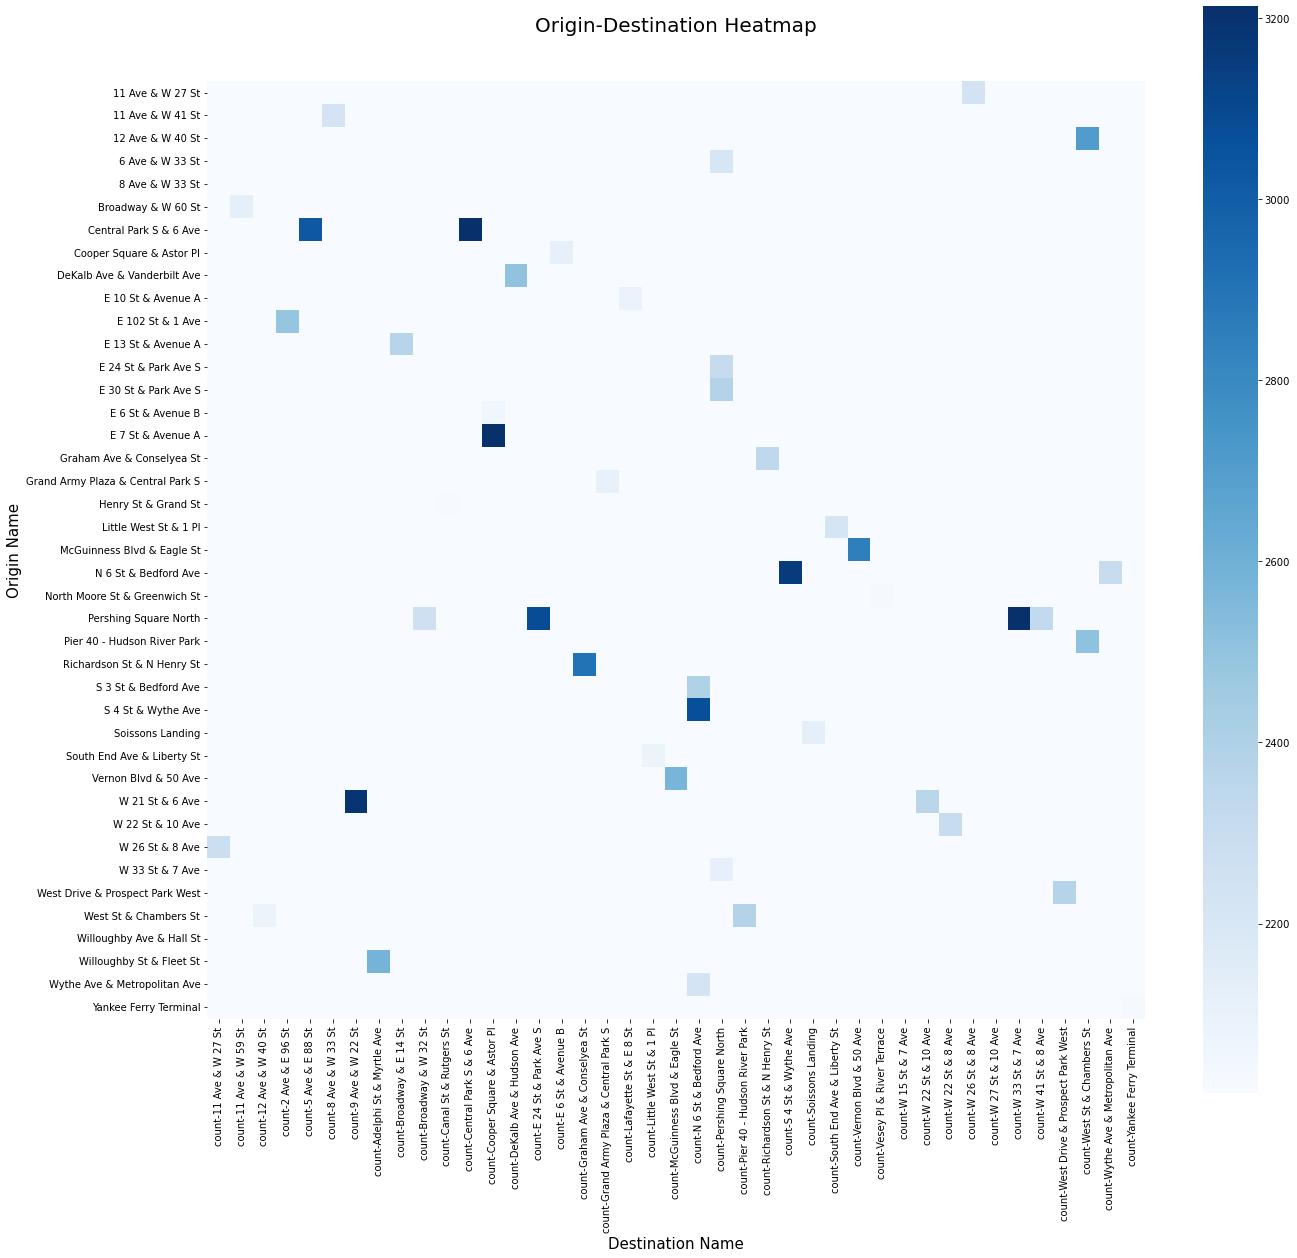

In [41]:
# Most popular trips

def trip_heatmap(df_sub):
    
    # Data
    
    df_trip = df_sub.copy()
    dff = df_trip.groupby(['start_station_name', 'end_station_name']).size()
    dff = dff.sort_values(ascending=False)
    dff = dff.reset_index()
    dff.columns.values[2] = 'count'
    dff = dff[:50]


    # Color scale for heatmap
    
    min_value = dff['count'].quantile(0.05)
    max_value = dff['count'].quantile(0.95)

    # Pivot
    
    dff = dff.pivot_table(index='start_station_name', columns='end_station_name', fill_value=0)
    dff.sort_index(level=0, ascending=True, inplace=True)

    # Figure
    
    fig, ax = plt.subplots(figsize=(21,20))
    sns.heatmap(dff,vmin=min_value,vmax=max_value, cmap='Blues',square=True)
    
    # Labeling
    
    ax.set_title('Origin-Destination Heatmap', fontdict={'fontsize':20}, pad = 50)
    ax.set_xlabel('Destination Name', fontsize= 15, x = 0.5)
    ax.set_ylabel('Origin Name', fontsize= 15)


trip_heatmap(df_sub)

In [42]:
# Distance travelled

def distance_measurement(start_location: pd.Series, end_location: pd.Series) -> pd.Series:
    list_of_distances = []
    for loc1, loc2 in zip(start_location.apply(lambda x: tuple(x)), end_location.apply(lambda x: tuple(x))):
        list_of_distances.append(hs.haversine(loc1, loc2))
    return pd.Series(list_of_distances)

df_sub['route_distance'] = distance_measurement(df_sub['start_station_location'], df_sub['end_station_location'])

In [43]:
df_sub.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,birth_year,gender,hour_of_day,age,trip_type,age_group,start_station_location,end_station_location,route_distance
0,11.333,2017-01-01 00:00:21,2017-01-01 00:11:41,3226.000,W 82 St & Central Park West,40.783,-73.971,3165.000,Central Park West & W 72 St,40.776,...,Subscriber,1965.000,F,0,52.000,average trip,"[50, 70]","[40.78275, -73.97137]","[40.77579376683666, -73.9762057363987]",0.874
8,4.250,2017-01-01 00:05:47,2017-01-01 00:10:02,430.000,York St & Jay St,40.701,-73.987,242.000,Carlton Ave & Flushing Ave,40.698,...,Subscriber,1989.000,M,0,28.000,short trip,"[18, 30]","[40.7014851, -73.98656928]","[40.697787, -73.973736]",3.680
12,33.417,2017-01-01 00:05:57,2017-01-01 00:39:23,524.000,W 43 St & 6 Ave,40.755,-73.983,3325.000,E 95 St & 3 Ave,40.785,...,Subscriber,1992.000,M,0,25.000,long trip,"[18, 30]","[40.75527307, -73.98316936]","[40.7849032, -73.950503]",1.527
16,14.983,2017-01-01 00:09:20,2017-01-01 00:24:19,515.000,W 43 St & 10 Ave,40.760,-73.995,3428.000,8 Ave & W 16 St,40.741,...,Subscriber,1970.000,M,0,47.000,average trip,"[30, 50]","[40.76009437, -73.99461843]","[40.740983, -74.001702]",5.037
20,5.850,2017-01-01 00:10:11,2017-01-01 00:16:02,3139.000,E 72 St & Park Ave,40.771,-73.964,3146.000,E 81 St & 3 Ave,40.776,...,Subscriber,1984.000,F,0,33.000,short trip,"[30, 50]","[40.77118287540658, -73.96409422159195]","[40.77573034, -73.9567526]",4.213


In [44]:
# Gender of riders

df_sub['gender'].value_counts(dropna = False)

M      8396672
F      2906707
N/A     647194
Name: gender, dtype: int64

In [45]:
# Age group distribution of riders

df_sub['age_group'].value_counts(dropna = False)

[30, 50]    6182938
[18, 30]    3220622
[50, 70]    2440024
[70+]         85067
[0, 18]       21922
Name: age_group, dtype: int64

Text(0, 0.5, 'count of riders')

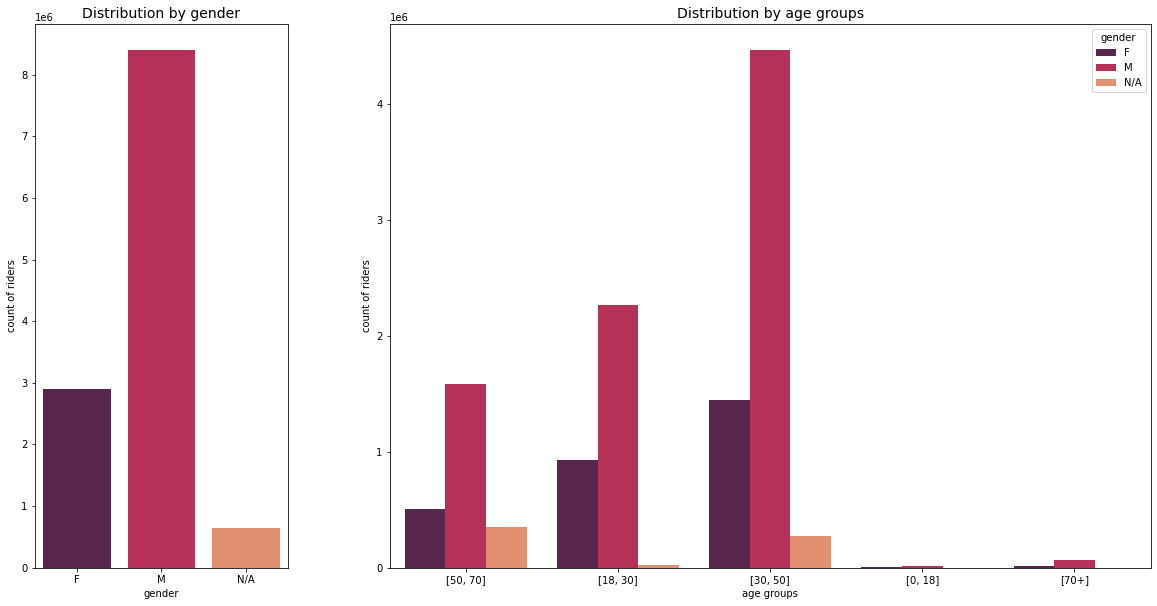

In [46]:
# Visualisations of Gender and Age distribution of Riders

fig, axes = plt.subplots(1, 2, figsize=(20, 10),  gridspec_kw={'width_ratios': [1, 3]})

sns.countplot(ax = axes[0], x='gender', data=df_sub, palette='rocket')
axes[0].set_title('Distribution by gender', size = 14)
axes[0].set_xlabel('gender')
axes[0].set_ylabel('count of riders')

sns.countplot(ax = axes[1], x='age_group', hue = 'gender',  data=df_sub, palette="rocket")
axes[1].set_title('Distribution by age groups', size = 14)
axes[1].set_xlabel('age groups')
axes[1].set_ylabel('count of riders')

In [ ]:
# Combined visualisation of Gender and Age distribution of Riders

plt.figure(figsize=(16,8))
plt.title('Distribution by age')
sns.histplot(data=df_sub, x="age", hue = 'gender', binwidth=1, kde = True)
plt.ylabel('count of riders')

/Users/Dimitris/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


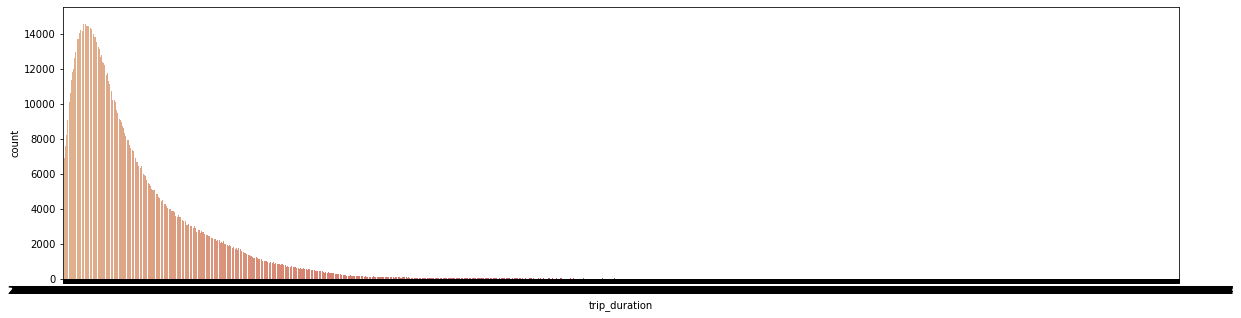

In [48]:
# Visualisation of Trip type by duration

plt.figure(figsize = (20,5))
sns.countplot(df_sub['trip_duration'],palette = 'flare')
plt.show()

In [ ]:
map1 = folium.Map(

    location=[40.732775,-74.105973],
    tiles='cartodbpositron',
    zoom_start= 15,
    max_width= 150, max_height=150
    
#     m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)

)


df_sub.apply(lambda row:folium.CircleMarker(location=[row["end_station_latitude"], row["end_station_longitude"]], popup=row["end_station_name"],radius=5, color="Red").add_to(map1), axis=1)
df_sub.apply(lambda row:folium.CircleMarker(location=[row["start_station_latitude"], row["end_station_latitude"]],popup=row["start_station_name"]).add_to(map1), axis=1)

In [ ]:
# dataset with start station name, start station location and count of starts
start_trip_info = df_sub.groupby('start_station_name').agg({'start_station_name':'count'}).rename(
    columns={'start_station_name' : 'count_of_starts'}).reset_index().sort_values(by = 'start_station_name')

start_trip_info['start_station_location'] = df_sub[['start_station_name', 'start_station_location']].drop_duplicates(
    subset='start_station_name').sort_values(by='start_station_name').reset_index(drop=True)['start_station_location']

#dataset with end station name, end station location and count of ends
end_trip_info = df_sub.groupby('end_station_name').agg({'end_station_name':'count'}).rename(
    columns={'end_station_name' : 'count_of_ends'}).reset_index().sort_values(by = 'end_station_name')

end_trip_info['end_station_location'] = df_sub[['end_station_name', 'end_station_location']].drop_duplicates(
    subset='end_station_name').sort_values(by='end_station_name').reset_index(drop=True)['end_station_location']
#dataset with station name, station location and sum of starts and ends
count_of_trips_by_stations = end_trip_info.merge(
    start_trip_info.rename(columns={'start_station_name': 'end_station_name'}), how='outer',
    on='end_station_name').rename(columns={'end_station_name': 'station_name'})

In [ ]:
# Sort by data sets by counts and keep top 50 results to use on map

start_trip_info_map = start_trip_info.sort_values(['count_of_starts'],ascending=False).iloc[:50]
end_trip_info_map = end_trip_info.sort_values(['count_of_ends'],ascending=False).iloc[:50]
start_trip_info_map.shape
end_trip_info_map.shape

In [ ]:
# Top 50 map stations which start the trips
map_points_of_start = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)
for point in start_trip_info_map.index:
    iframe = folium.IFrame(f'Station:"{start_trip_info_map["start_station_name"][point]}" <br>' 
                           f'Count of started trips:{start_trip_info_map["count_of_starts"][point]}')
    popup = folium.Popup(iframe, min_width=250, max_width=250)
    folium.Marker(start_trip_info_map['start_station_location'][point], popup=popup,
    icon=folium.Icon(color='darkblue', icon='bicycle', prefix='fa')).add_to(map_points_of_start)
    
# Top 50 map stations which end the trips
map_points_of_end = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)
for point in end_trip_info_map.index:
    iframe = folium.IFrame(f'Station:"{end_trip_info_map["end_station_name"][point]}" <br>' 
                           f'Count of ended trips:{end_trip_info_map["count_of_ends"][point]}')
    popup = folium.Popup(iframe, min_width=250, max_width=250)
    folium.Marker(end_trip_info_map['end_station_location'][point], popup=popup,
    icon = folium.Icon(color='green', icon='home')).add_to(map_points_of_end)
    
# create subplots
htmlmap = HTML('<iframe srcdoc="{}" style="float:left; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           '<iframe srcdoc="{}" style="float:right; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           .format(map_points_of_start.get_root().render().replace('"', '&quot;'),500,500,
            map_points_of_end.get_root().render().replace('"', '&quot;'),500,500))
display(htmlmap)

In [102]:
# Top routes

trips_df = pd.DataFrame()
trips_df = df_sub.groupby(['start_station_name','end_station_name']).size().reset_index(name = 'Number of trips')
trips_df = trips_df.sort_values('Number of trips',ascending = False)
trips_df["start_station_name"] = trips_df["start_station_name"].astype(str)
trips_df["end_station_name"] = trips_df["end_station_name"].astype(str)
trips_df["Top routes"] = trips_df["start_station_name"] + " to " + trips_df["end_station_name"]
trips_df = trips_df[:10]
trips_df = trips_df.reset_index()
trips_df

,index,start_station_name,end_station_name,Number of trips,Top routes
0,176705,E 7 St & Avenue A,Cooper Square & Astor Pl,4270,E 7 St & Avenue A to Cooper Square & Astor Pl
1,95336,Central Park S & 6 Ave,Central Park S & 6 Ave,3463,Central Park S & 6 Ave to Central Park S & 6 Ave
2,282954,Pershing Square North,W 33 St & 7 Ave,3231,Pershing Square North to W 33 St & 7 Ave
3,339689,W 21 St & 6 Ave,9 Ave & W 22 St,3190,W 21 St & 6 Ave to 9 Ave & W 22 St
4,270783,N 6 St & Bedford Ave,S 4 St & Wythe Ave,3159,N 6 St & Bedford Ave to S 4 St & Wythe Ave
5,282576,Pershing Square North,E 24 St & Park Ave S,3082,Pershing Square North to E 24 St & Park Ave S
6,299140,S 4 St & Wythe Ave,N 6 St & Bedford Ave,3068,S 4 St & Wythe Ave to N 6 St & Bedford Ave
7,95258,Central Park S & 6 Ave,5 Ave & E 88 St,3028,Central Park S & 6 Ave to 5 Ave & E 88 St
8,292312,Richardson St & N Henry St,Graham Ave & Conselyea St,2907,Richardson St & N Henry St to Graham Ave & Con...
9,257485,McGuinness Blvd & Eagle St,Vernon Blvd & 50 Ave,2851,McGuinness Blvd & Eagle St to Vernon Blvd & 50...


In [73]:
start_trip_info_map.head()

,start_station_name,count_of_starts,start_station_location
808,Pershing Square North,105440,"[40.751873, -73.977706]"
405,E 17 St & Broadway,75352,"[40.73704984, -73.99009296]"
209,Broadway & E 22 St,72891,"[40.7403432, -73.98955109]"
966,W 21 St & 6 Ave,72316,"[40.74173969, -73.99415556]"
141,8 Ave & W 31 St,66852,"[40.7505853470215, -73.9946848154068]"


In [74]:
end_trip_info_map.head()

,end_station_name,count_of_ends,end_station_location
815,Pershing Square North,105148,"[40.751873, -73.977706]"
406,E 17 St & Broadway,78485,"[40.73704984, -73.99009296]"
209,Broadway & E 22 St,77990,"[40.7403432, -73.98955109]"
973,W 21 St & 6 Ave,73758,"[40.74173969, -73.99415556]"
1060,West St & Chambers St,69043,"[40.71754834, -74.01322069]"


In [87]:
df_sub.shape

(11950573, 22)

In [52]:
count_of_trips_by_stations.head()

,station_name,count_of_ends,end_station_location,count_of_starts,start_station_location
0,1 Ave & E 110 St,6432.000,"[40.7923272, -73.9383]",6524.000,"[40.7923272, -73.9383]"
1,1 Ave & E 16 St,48720.000,"[40.73221853, -73.98165557]",48814.000,"[40.73221853, -73.98165557]"
2,1 Ave & E 18 St,34620.000,"[40.73381219196632, -73.98054420948029]",35071.000,"[40.73381219196632, -73.98054420948029]"
3,1 Ave & E 30 St,28729.000,"[40.74144387, -73.97536082]",28392.000,"[40.74144387, -73.97536082]"
4,1 Ave & E 44 St,21801.000,"[40.75001986, -73.96905301]",21455.000,"[40.75001986, -73.96905301]"


In [77]:
# Export data sets

df_sub.to_csv('df_sub.csv')

In [78]:
start_trip_info.to_csv('df_start_trip_info.csv')

In [79]:
end_trip_info.to_csv('df_end_trip_info.csv')

In [85]:
start_trip_info.to_excel('df_start_trip_info.xlsx')

In [86]:
end_trip_info.to_excel('df_end_trip_info.xlsx')

In [97]:
start_trip_info_map.to_csv('df_start_trip_info_map.csv')
end_trip_info_map.to_csv('df_end_trip_info_map.csv')